# Sentiment Analysis with twitter data  
This project entails analyzing the sentiment associated with tweets on the current pandemic of covid-19.  
The data is obtained from twitter using a script I designed,you may have a look at it [here.](https://github.com/lyraxvincent/twitter-tweepy/blob/master/tweetscrap.py) (with a few modifications of the script of course)  
I modified the script to fit the needs:
- Tweets obtained are only from the country Kenya
- Tweets obtained are only in the English language
- No retweets obtained

I used the powerful text processing python module **TextBlob** for this task.

**Import necessary modules**

In [1]:
import pandas as pd
from textblob import TextBlob

Load the data

In [2]:
tweets = pd.read_csv('covidKE tweets.csv')

Viewing the data

In [3]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1190 non-null   int64 
 1   text        1190 non-null   object
 2   created_at  1190 non-null   object
 3   likes       1190 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.3+ KB


An example to show how we get the sentiment score/polarity for a single tweet

In [5]:
TextBlob(tweets.text[0]).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.6000000000000001)

In [7]:
TextBlob(tweets['text'][0]).sentiment.polarity

0.39999999999999997

Now we design a function to apply to the text column to produce polarity for each tweet

In [9]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

We add a new column to the dataframe based off of tweet polarity

In [10]:
tweets['polarity'] = tweets['text'].apply(get_polarity)

In [13]:
tweets.sample(30)

,tweet_id,text,created_at,likes,polarity
996,1242078449537290241,If the government wants the cost of living to ...,2020-03-23 13:19:13,1,-0.100000
935,1242082647611977729,We must respect human rights and stand united ...,2020-03-23 13:35:54,0,0.000000
295,1242080726918496259,What To Do If You Suspect Your Loved One Has C...,2020-03-23 13:28:16,0,0.700000
81,1242067160962232322,Hard headed Spring breakers from University of...,2020-03-23 12:34:22,0,-0.032197
928,1242083410140712961,"Blind Dates Can Be Good, I Even Married Mine! ...",2020-03-23 13:38:56,0,0.170833
291,1242080993336594437,Dating Answers in the Context of Online Dating...,2020-03-23 13:29:20,0,0.000000
1047,1242075342145310720,Karen residents are surrounded by largest slum...,2020-03-23 13:06:52,1,-0.166667
419,1242104208242991104,The govt of Kenya is doing things on reverse o...,2020-03-23 15:01:35,0,-0.200000
292,1242109862189961218,Kenyans will never learn.\n#coronaviruskenya h...,2020-03-23 15:24:03,0,0.000000
819,1242089705979752448,God gave govt months to prepare wholistically ...,2020-03-23 14:03:57,0,0.000000


Tweets with lowest polarity(-1)

In [31]:
tweets[tweets['polarity'] == -1]

,tweet_id,text,created_at,likes,polarity
357,1242106974927573000,@SafaricomPLC Apana tunataka zile za 200 MBs ....,2020-03-23 15:12:34,2,-1.0
645,1242096205234085894,The worst thing about #MulikaCorona #coronavir...,2020-03-23 14:29:47,1,-1.0
1009,1242077721976545280,#kplccustomercare this is the worst time to cu...,2020-03-23 13:16:20,0,-1.0


Tweets with polarity 0

In [29]:
tweets[tweets['polarity'] == 0]

,tweet_id,text,created_at,likes,polarity
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0,0.0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0,0.0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0,0.0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0,0.0
5,1242123307903844353,I like what @HassanAliJoho said about #coronav...,2020-03-23 16:17:28,0,0.0
...,...,...,...,...,...
1181,1242064302816874502,@Its_Jakusa @GeorgeW27191819 The inequality in...,2020-03-23 12:23:00,0,0.0
1182,1242064212895174662,1 death in Zimbabwe with only 3 Corona Virus c...,2020-03-23 12:22:39,4,0.0
1183,1242064211800477697,Three Kakamega County officials who came back ...,2020-03-23 12:22:39,2,0.0
1184,1242064200840744960,Let's be Graceful enough to observe protocol. ...,2020-03-23 12:22:36,2,0.0


Tweets with highest polarity(1)

In [30]:
tweets[tweets['polarity'] == 1]

,tweet_id,text,created_at,likes,polarity
237,1242112888082481153,#coronaviruskenya Lets be the best version of...,2020-03-23 15:36:04,0,1.0
1055,1242074830842793985,This is probably the best thing you'll read to...,2020-03-23 13:04:50,1,1.0
1066,1242073657297551370,We create the best shoe impression \n\n#Minuel...,2020-03-23 13:00:11,0,1.0


In [33]:
# It is evident that almost half of the obtained tweets have polarity 0

Tweets with negative polarity

In [34]:
tweets[tweets['polarity'] < 0]

,tweet_id,text,created_at,likes,polarity
10,1242099789694750720,I need help here does it mean ukipata corona n...,2020-03-23 14:44:01,1,-0.3125
11,1242099788893564929,Not having money during this #coronaviruskenya...,2020-03-23 14:44:01,0,-0.5000
14,1242116304934440961,I hope CS Mutahi can see what other government...,2020-03-23 15:49:39,6,-0.1250
19,1242122752032718849,I don't understand why mutahi is pleading with...,2020-03-23 16:15:16,1,-0.1250
26,1242085595842838529,The Unga revolution we've all been waiting for...,2020-03-23 13:47:37,0,-0.3000
...,...,...,...,...,...
1171,1242064802916306944,@KanzeDena finally its out there.Thank you\nNo...,2020-03-23 12:25:00,4,-0.2000
1172,1242064801540591621,@citizentvkenya #coronaviruskenya \nSo sad. \n...,2020-03-23 12:24:59,3,-0.5000
1174,1242064688533438464,@StarTimesKenya you have very poor services a...,2020-03-23 12:24:32,2,-0.5200
1186,1242064012797530112,@OleItumbi Time to put it mandatory😓😓I hate wh...,2020-03-23 12:21:51,1,-0.8000


Tweets with positive polarity

In [35]:
tweets[tweets['polarity'] > 0]

,tweet_id,text,created_at,likes,polarity
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1,0.400000
8,1242069774231887880,I wish this would have been the much anticipat...,2020-03-23 12:44:45,2,0.100000
13,1242116336739913728,Taken out since last Friday to buy gas. Seems ...,2020-03-23 15:49:46,1,0.037500
16,1242122964608434181,We are in this together.\nLet's be safe and st...,2020-03-23 16:16:06,1,0.500000
20,1242099340342067203,Confirmed #coronavirus cases in Kenya stands a...,2020-03-23 14:42:14,5,0.433333
...,...,...,...,...,...
1176,1242064663577272321,Advice for Young Cubs Looking for Sugar Mummy ...,2020-03-23 12:24:26,1,0.100000
1177,1242064476834324481,One would have wished to see a more emotional ...,2020-03-23 12:23:42,4,0.250000
1179,1242064465413226496,Very soon some parts of the country will start...,2020-03-23 12:23:39,2,0.200000
1185,1242064075405905921,SIAYA EMERGENCY response team sent to trace co...,2020-03-23 12:22:06,4,0.113636


## Some EDA

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

**Distribution of polarity**

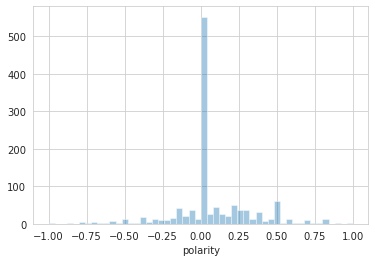

In [20]:
sns.distplot(tweets['polarity'], bins=50, kde=False)